In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df =pd.read_csv('dataset.csv') #loading the dataset available

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
missing_val_cols = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]

In [ ]:
for col in missing_val_cols:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)
    

In [ ]:
df.isnull().sum()

In [ ]:
df['type'].value_counts()

In [ ]:
df['quality'].value_counts()

/Users/shalini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


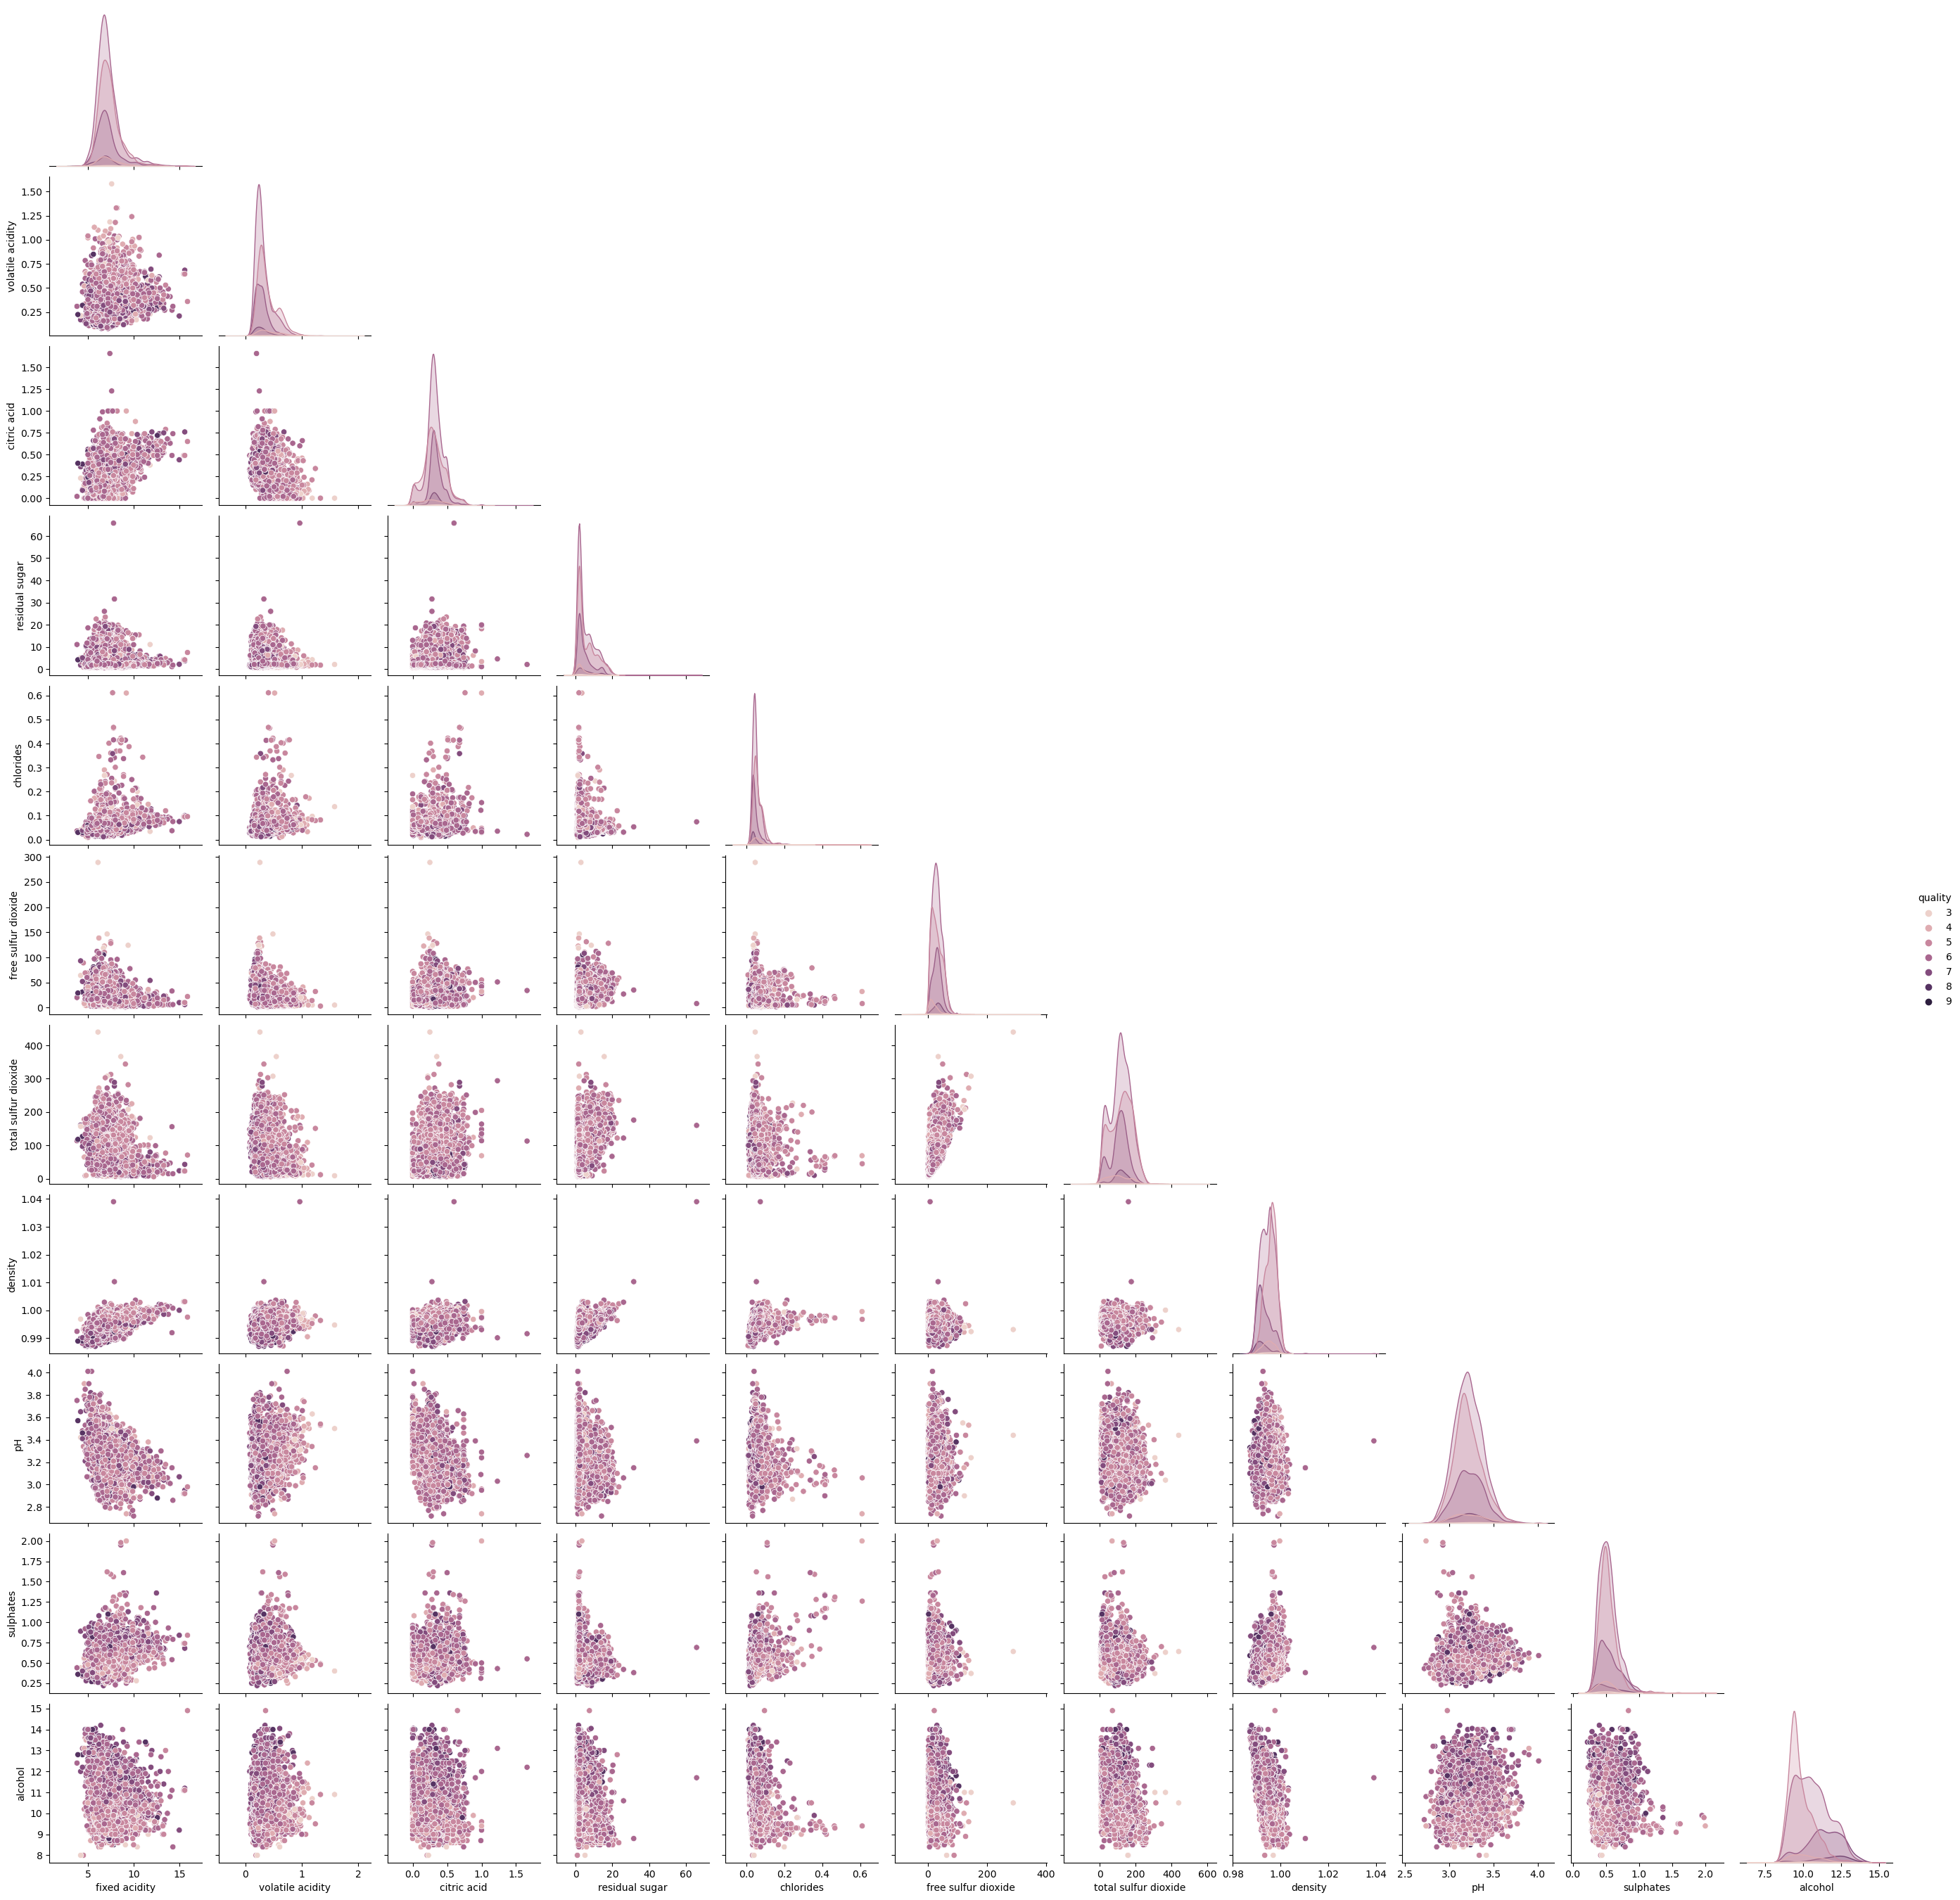

In [22]:
sns.pairplot(df, hue='quality', corner=True)

/Users/shalini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


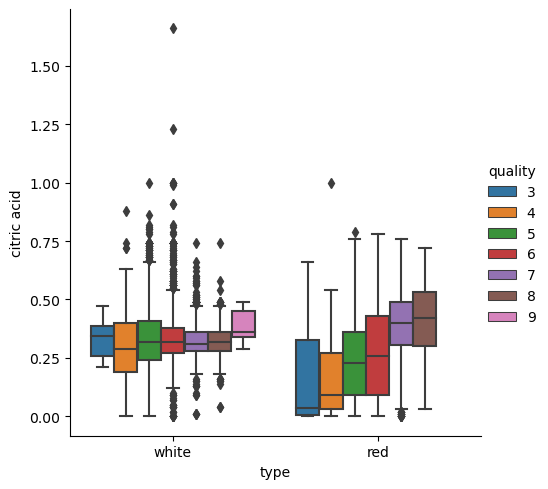

In [23]:
sns.catplot(x="type", y="citric acid", kind="box", hue="quality", data=df)

<Axes: xlabel='quality', ylabel='count'>

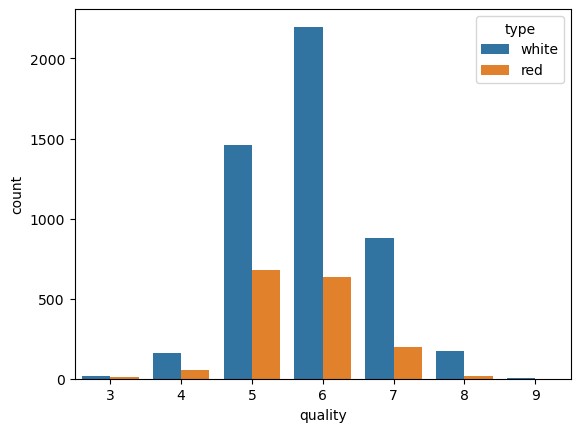

In [24]:
sns.countplot(x="quality", hue="type", data=df)

<Axes: xlabel='type', ylabel='count'>

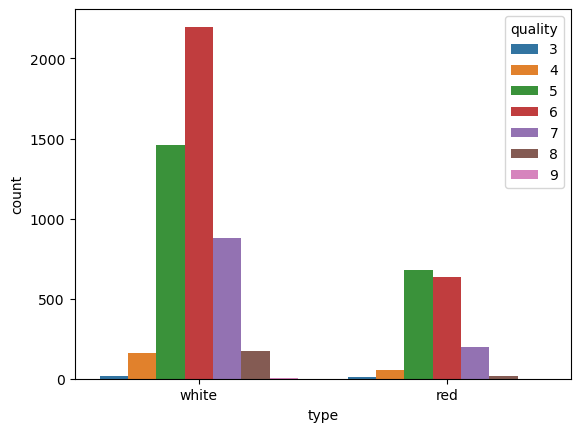

In [25]:
sns.countplot(x="type", hue="quality", data=df)

In [31]:
corr = df.corr()

ValueError: could not convert string to float: 'white'

NameError: name 'corr' is not defined

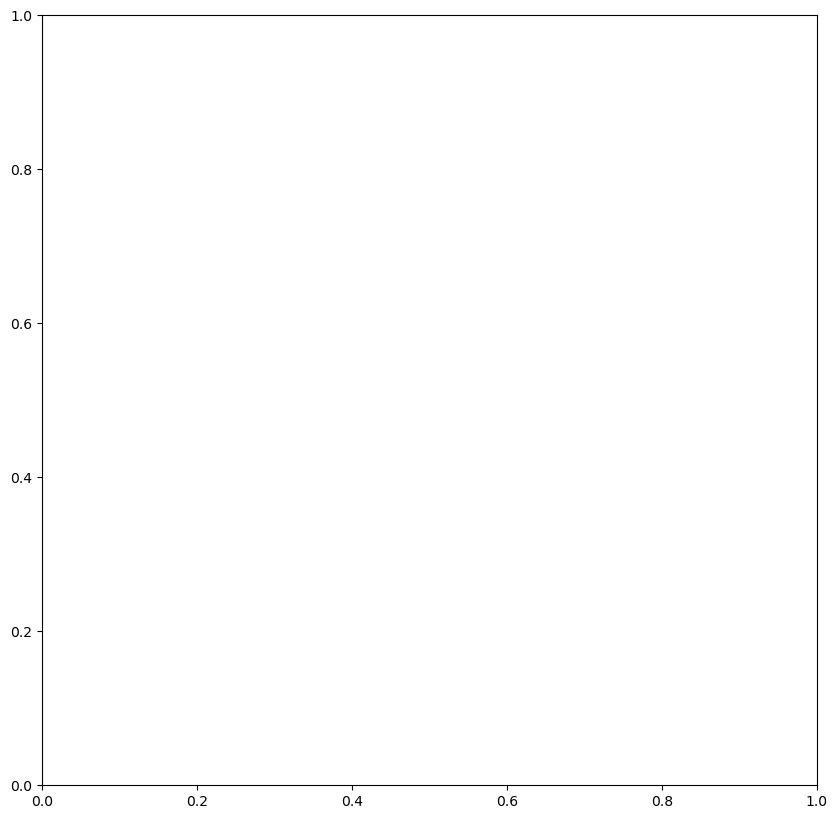

In [32]:
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True), vmin=-1, vmax=1, linewidths=.5, fmt=".2f")

In [33]:
df = pd.get_dummies(df, drop_first=True)

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True


In [35]:
df = df.rename(columns={"type_white": "wine_type"})

In [36]:
df["wine_quality"] = [1 if x>6 else 0 for x in df.quality]

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,True,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,True,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,True,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True,0


In [38]:
y = df["wine_quality"]

In [39]:
y.value_counts()

wine_quality
0    5220
1    1277
Name: count, dtype: int64

In [40]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: wine_quality, Length: 6497, dtype: int64

In [41]:
x = df.drop(["quality", "wine_quality"], axis=1)

In [42]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,False
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,False


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
log = pd.DataFrame(columns=["model", "accuracy"])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
from lib.utils import *
ac=[]

ModuleNotFoundError: No module named 'lib'

In [50]:

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=12))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(X_train,y_train,epochs=6)
ac.append(accuracy_score(model,y_test,sample_weight=0.8)*100)

ModuleNotFoundError: No module named 'keras'

In [51]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test)*100)


NameError: name 'ac' is not defined

In [52]:

plt.style.use('ggplot')
x=['ANN','Lasso Regression']
 
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)

NameError: name 'ac' is not defined